In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:\\Users\\cocob\\Downloads\\Crime.csv', encoding = "ISO-8859-1")

In [4]:
print(data.shape)
print(data.columns)

(192, 5)
Index(['Unnamed: 0', 'County', 'Year', 'Crime', 'Year2'], dtype='object')


In [5]:
data.dropna()

,Unnamed: 0,County,Year,Crime,Year2
0,1,ANNE ARUNDEL,2006,3167,0
1,2,BALTIMORE CITY,2006,10871,0
2,3,BALTIMORE COUNTY,2006,5713,0
3,4,CALVERT,2006,257,0
4,5,CAROLINE,2006,149,0
5,6,CARROLL,2006,374,0
6,7,CECIL,2006,490,0
7,8,CHARLES,2006,729,0
8,9,DORCHESTER,2006,181,0
9,10,FREDERICK,2006,752,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A7470A2E8>]],
      dtype=object)

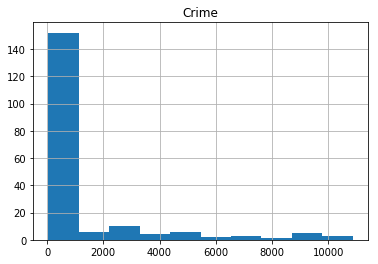

In [12]:
data[['Crime']].hist()

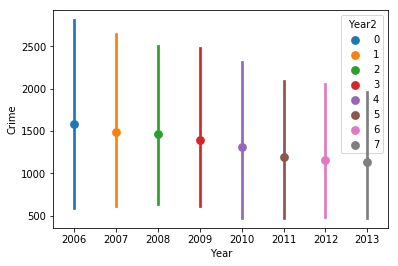

In [13]:
sns.axes_style('white')
sns.pointplot(x='Year', y='Crime', hue='Year2', data=data)

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
model = smf.mixedlm("Crime ~ 1",data=data,groups=data['Unnamed: 0'])
result = model.fit(method='nm',maxiter=200, full_output=True)
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Crime       
No. Observations: 192     Method:             REML        
No. Groups:       192     Scale:              2713547.0713
Min. group size:  1       Likelihood:         -1754.5563  
Max. group size:  1       Converged:          Yes         
Mean group size:  1.0                                     
-----------------------------------------------------------
               Coef.     Std.Err.  z  P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept      1341.620                                    
groups RE   2713547.071                                    



c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2039: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2372: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:17

In [17]:
def ICC(fittedmodel):
    between_var= fittedmodel.cov_re.iloc[0,0]
    resid=fittedmodel.scale
    icc=between_var/(between_var+resid)
    return icc

In [18]:
print('The Intraclass Correlation is: {}'.format(ICC(result)))


The Intraclass Correlation is: 0.5


In [19]:
print('running random intercept model')
ri_model = smf.mixedlm("Crime ~ Year",data=data,groups=data['Unnamed: 0'])
ri_result = ri_model.fit(method='nm',maxiter=200, full_output=True)
print(ri_result.summary())
print("done!")

running random intercept model
                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Crime       
No. Observations:     192         Method:                 REML        
No. Groups:           192         Scale:                  2748352.3260
Min. group size:      1           Likelihood:             -1748.9208  
Max. group size:      1           Converged:              Yes         
Mean group size:      1.0                                             
----------------------------------------------------------------------
             Coef.      Std.Err.     z    P>|z|    [0.025     0.975]  
----------------------------------------------------------------------
Intercept  136642.970   147510.247  0.926 0.354 -152471.801 425757.741
Year          -67.331       73.406 -0.917 0.359    -211.205     76.543
groups RE 2683254.358 66501939.750                                    

done!


In [21]:
print('running random slopes model')
rs_model = smf.mixedlm("Crime ~ Year",data=data,groups=data['Unnamed: 0'], re_formula="~0+Year")
rs_result = rs_model.fit(method='nm',maxiter=200, full_output=True)
print(rs_result.summary())
print("done!")

print('running random intercept and random slopes model')
ris_model = smf.mixedlm("Crime ~ Year",data=data,groups=data['Unnamed: 0'], re_formula="~Year")
ris_result = ris_model.fit(method='nm', maxiter=200, full_output=True)
print(ris_result.summary())
print("done!")

running random slopes model


c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2039: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Crime     
No. Observations:      192        Method:                REML      
No. Groups:            192        Scale:                 1.2188    
Min. group size:       1          Likelihood:            -1748.9688
Max. group size:       1          Converged:             Yes       
Mean group size:       1.0                                         
-------------------------------------------------------------------
            Coef.     Std.Err.    z    P>|z|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 136648.523 147547.143  0.926 0.354 -152538.564 425835.609
Year         -67.334     73.425 -0.917 0.359    -211.244     76.577
Year RE        1.346                                               

done!
running random intercept and random slopes model
                     Mixed Linear Model Regression Results
Model:          

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2039: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [22]:
from scipy.stats import chi2

def likelihood_ratio_test(bigmodel, smallmodel):
    likelihoodratio=2*(bigmodel.llf-smallmodel.llf)
    df=bigmodel.df_modelwc-smallmodel.df_modelwc
    p=chi2.sf(likelihoodratio, df)
    return p


lrt=likelihood_ratio_test(ris_result,ri_result)
print('The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: {}'.format(lrt))

The p-value for the likelihood ratio test of the random intercept and random intercept/slope models is: 1.0
